In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

plt.rcParams['figure.figsize'] = [12,8]

In [146]:
attractor_r = 1
attractor_height = 1

r_slit = 2*attractor_r/3
slit_width = attractor_r/5

In [147]:
def get_density(r, phi, z):
    # returns density at any r, phi, z point in space
    # origin at center of attractor
    
    if r > attractor_r:
        return 0.0
    
    if np.abs(z) > attractor_height/2:
        return 0.0
    
    # if np.abs(r - r_slit) < slit_width/2 and (phi>=0 and phi<=np.pi/2):
        # return 0.0
    
    return 1.0

def build_3d_array(r_range=(-2,2), dr=0.1, \
                   phi_range=(0, 2*np.pi), dphi=np.pi/180, \
                   z_range=(-2,2), dz=0.1):
    
    rr = np.arange(r_range[0], r_range[1]+dr, dr)
    pp = np.arange(phi_range[0], phi_range[1]+dphi, dphi)
    zz = np.arange(z_range[0], z_range[1]+dz, dz)
    
    rho_grid = np.zeros((rr.size, pp.size, zz.size))
    
    for i, r in enumerate(rr):
        for j, phi in enumerate(pp):
            for k, z in enumerate(zz):
                rho_grid[i,j,k] = get_density(r, phi, z)
    
    return rr, pp, zz, rho_grid

def plot_xy_density(output_array, z_ind):
    
    rr, pp, zz, rho_grid = output_array
    rho_cyl = rho_grid[:,:,z_ind]
    rho_cart = np.zeros((2*rr.size, 2*rr.size))
    
    center_i = rr.size-1
    
    for i, r in enumerate(rr):
        for j, phi in enumerate(pp):
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            
            x_i = center_i + x*rr.size/attractor_r
            x_i = int(round(x_i))
            y_i = center_i + y*rr.size/attractor_r
            y_i = int(round(y_i))
            
            # print(x_i, y_i)
            try:
                rho_cart[x_i,y_i] = rho_cyl[i,j]
            except:
                pass
            
    plt.imshow(rho_cart)

In [148]:
output = build_3d_array()

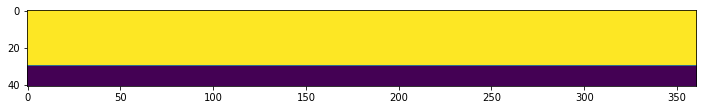

In [150]:
rho = output[3][:,:,20]
plt.imshow(rho)

In [154]:
test_interp = interp2d(output[0], output[1], rho.T)

In [161]:
test_interp(0,100)

array([1.])

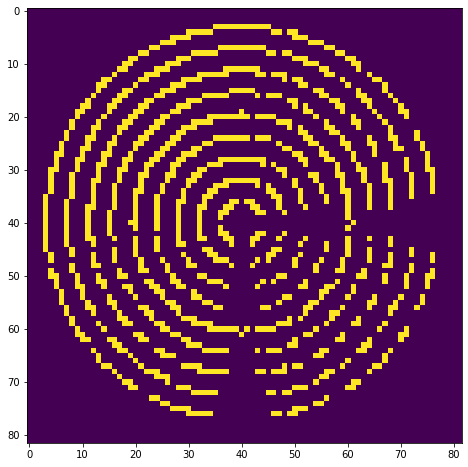

In [130]:
plot_xy_density(output, 20)

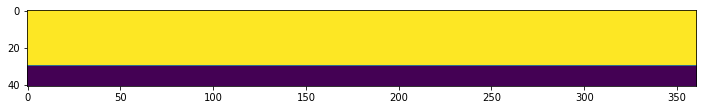

In [133]:
plt.imshow(output[3][:,:,20])

In [134]:
import cv2
plt.imshow(cv2.linearPolar(output[3][:,:,20]))

TypeError: Required argument 'center' (pos 2) not found

In [137]:
def polar_to_cart(polar_data, theta_step, range_step, x, y, order=3):

    from scipy.ndimage.interpolation import map_coordinates as mp

    # "x" and "y" are numpy arrays with the desired cartesian coordinates
    # we make a meshgrid with them
    X, Y = np.meshgrid(x, y)

    # Now that we have the X and Y coordinates of each point in the output plane
    # we can calculate their corresponding theta and range
    Tc = np.degrees(np.arctan2(Y, X)).ravel()
    Rc = (np.sqrt(X**2 + Y**2)).ravel()

    # Negative angles are corrected
    Tc[Tc < 0] = 360 + Tc[Tc < 0]

    # Using the known theta and range steps, the coordinates are mapped to
    # those of the data grid
    Tc = Tc / theta_step
    Rc = Rc / range_step

    # An array of polar coordinates is created stacking the previous arrays
    coords = np.vstack((Tc, Rc))

    # To avoid holes in the 360º - 0º boundary, the last column of the data
    # copied in the begining
    polar_data = np.vstack((polar_data, polar_data[-1,:]))

    # The data is mapped to the new coordinates
    # Values outside range are substituted with nans
    cart_data = mp(polar_data, coords, order=order, mode='constant', cval=np.nan)

    # The data is reshaped and returned
    return(cart_data.reshape(len(y), len(x)).T)

In [138]:
polar_to_cart(output[3][:,:,20], np.pi/180, 0.1, np.linspace(-2,2, 50), np.linspace(-2,2,50))

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [144]:
from cv2 import linearPolar
?linearPolar

Docstring:
linearPolar(src, center, maxRadius, flags[, dst]) -> dst
.   @brief Remaps an image to polar coordinates space.
.   
.   @deprecated This function produces same result as cv::warpPolar(src, dst, src.size(), center, maxRadius, flags)
.   
.   @internal
.   Transform the source image using the following transformation (See @ref polar_remaps_reference_image "Polar remaps reference image c)"):
.   \f[\begin{array}{l}
.     dst( \rho , \phi ) = src(x,y) \\
.     dst.size() \leftarrow src.size()
.   \end{array}\f]
.   
.   where
.   \f[\begin{array}{l}
.     I = (dx,dy) = (x - center.x,y - center.y) \\
.     \rho = Kmag \cdot \texttt{magnitude} (I) ,\\
.     \phi = angle \cdot \texttt{angle} (I)
.   \end{array}\f]
.   
.   and
.   \f[\begin{array}{l}
.     Kx = src.cols / maxRadius \\
.     Ky = src.rows / 2\Pi
.   \end{array}\f]
.   
.   
.   @param src Source image
.   @param dst Destination image. It will have same size and type as src.
.   @param center The transformation cent